# Homework 2: Contest

**Author:** Franklin Oliveira

------

On this homework, we're supposed to predict how high schools will perform in the Brazilian national
exam ENEM. To perform this task, it was given to us some datasets containing information about schools located in the state of [São Paulo](https://pt.wikipedia.org/wiki/S%C3%A3o_Paulo_(estado)). 

The variable of interest (to be predicted) is the <font color='#ff8000'>**performance of the students in the ENEM exam in 2015**</font>. 

Further details can be found at this [file](Contest%20Description.pdf).

We'll mainly focus on the [ENEM2015.csv](Data/ENEM2015.csv) file as it contains the classification of the high schools in the ENEM exam. We'll also look for explainable features on the other datasets to associate with each school in order to build a good predictive model.

------

**As common, we'll begin with some imports...**

In [1]:
%matplotlib inline

import pathlib
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

**Now, let's define paths...**

In [2]:
# path to datasets
datapath = pathlib.Path('Data')

# path to outputs generated in this notebook
outpath = pathlib.Path('Output')

## Importing datasets

Now, we're ready to take a look into some datasets. Let's begin with <font color='blue'>ENEM2015.csv</font>


### ENEM 2015

First, we'll import this dataset and do some exploratory analysis.

In [3]:
enem2015 = pd.read_csv('Data/ENEM2015.csv', sep=',', encoding='latin-1')

enem2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 3 columns):
CODIGO DA ENTIDADE         1243 non-null int64
NUMERO DE PARTICIPANTES    1243 non-null int64
Classificacao              1243 non-null int64
dtypes: int64(3)
memory usage: 29.2 KB


<br>

As we can see, in this dataset we have **1243 non-null observations**. A brief description on each column is presented below.

> - `CODIGO DA ENTIDADE` (8 digit *int*): entity (school) ID number on [INEP](https://enem.inep.gov.br/)
> - `NUMERO DE PARTICIPANTES` (*int*): number of students that took the ENEM exam in 2015 from that school 
> - `Classificacao` (*int number from 0 to 4*): classification of that school based on its students performance (4 = good performance, 0 = poor performance). **This is our variable of interest**.

------

Let's go a bit further and visualize some descriptive informations.

**How many different schools are there in our dataset?**

In [4]:
print('# of schools:', len(enem2015['CODIGO DA ENTIDADE'].unique()))

# of schools: 1243


**How is the distribution of the number of participants?**

In the histogram below we can see that the majority of schools have had less than 100 participants.

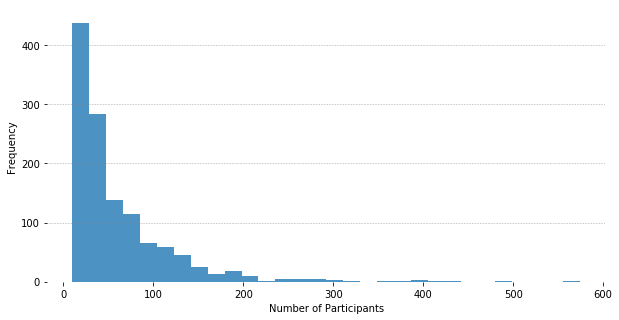

In [5]:
ax = enem2015['NUMERO DE PARTICIPANTES'].plot(kind='hist', bins=30, figsize=(10,5), alpha=0.8)

plt.xlabel('Number of Participants')
# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# adding horizontal grid lines
ax.yaxis.grid(zorder=0, which="major", color='gray', linestyle=':', linewidth=0.6)

**How many schools got a certain classification (0-4)?**

# of schools per classification group
               0    1    2    3   4
Classificacao  2  193  865  126  57


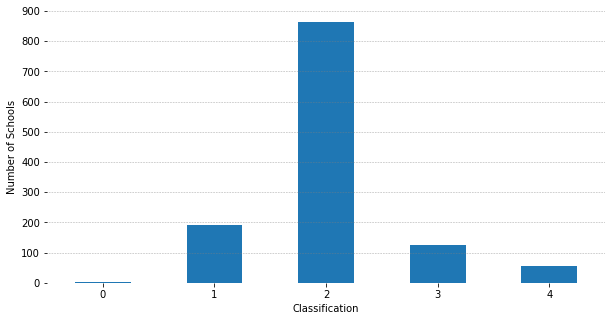

In [6]:
df_to_plot = enem2015.groupby('Classificacao').count()['CODIGO DA ENTIDADE']

print('# of schools per classification group')
print(pd.DataFrame(enem2015['Classificacao'].value_counts()).sort_index().transpose())

ax = df_to_plot.plot(kind='bar', color='tab:blue', figsize=(10,5))

### Adjusting aesthetics
# labels
plt.ylabel('Number of Schools')
plt.xlabel('Classification')

# y axis range
plt.ylim((0,900))

# x axis ticks orientation
plt.xticks(rotation=0)

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# adding horizontal grid lines
ax.yaxis.grid(zorder=0, which="major", color='gray', linestyle=':', linewidth=0.6)

<br>

**Did the number of participants somehow influence the school classification for the year of 2015?**

Let's try to answer this question in the following chart.

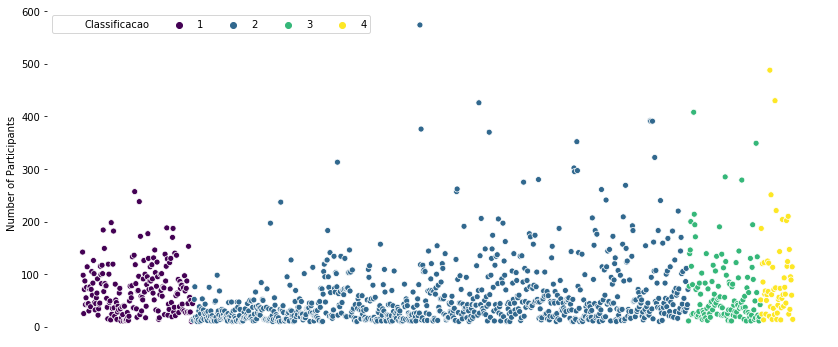

In [8]:
plt.figure(figsize=(14,6))

# excluding 2 observations with classification = 0
df_to_plot = enem2015[enem2015['Classificacao'] != 0]

ax = sns.scatterplot(x=range(len(df_to_plot)), y='NUMERO DE PARTICIPANTES', 
                     data=df_to_plot.sort_values('Classificacao'), hue='Classificacao',
                     palette='viridis')

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# labels
ax.set(xticklabels=[], xticks=[], ylabel='Number of Participants')

# legend location
plt.legend(loc='upper left', ncol=5)

In the chart above we see that there's no apparent different in the number of participants among schools with different classifications. However, this graph is not so informative and we should be careful with its interpretation.  

The only information we can take from this graph is that schools with different performance classification didn't have that much difference in the number of participants. 

We might tend to think that schools with <font color='blue'>classification = 2</font> have had a higher number of participants on the 2015 ENEM edition, but we should be careful with that thought because the majority of schools in our dataset got that exact classification number. 

------

In the next chart, we see that the distribution of the `NUMERO DE PARTIFIPANTES` feature is almost the same in every classification group (with some minnor differences, but they're all assymetric with bigger mass on the interval [0,100]). 

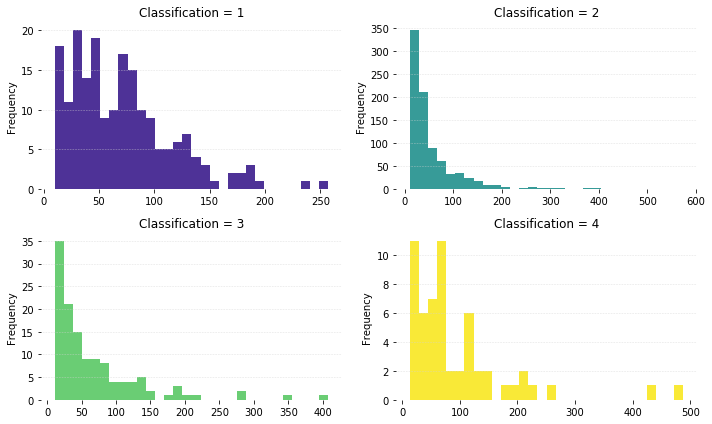

In [9]:
fig, axis = plt.subplots(nrows=2,ncols=2, figsize=(10,6))

colors = ['#3B1C8C', '#21908D', '#5AC865', '#F9E721']
classif=1  # classification number
for i in range(2):
    for j in range(2):
        enem2015[enem2015['Classificacao']==classif]['NUMERO DE PARTICIPANTES'].plot(kind='hist', 
                                                                    bins=30, alpha=0.9, ax=axis[i,j],
                                                                    color = colors[classif-1])
        axis[i,j].set_title('Classification = {}'.format(classif))
        
        # removing frames
        axis[i,j].spines['top'].set_visible(False)
        axis[i,j].spines['right'].set_visible(False)
        axis[i,j].spines['bottom'].set_visible(False)
        axis[i,j].spines['left'].set_visible(False)
        
        # adding horizontal grid lines
        axis[i,j].yaxis.grid(zorder=0, which="major", color='lightgray', linestyle=':', linewidth=0.6)
        
        classif += 1
        

plt.tight_layout()

### Dados Escolares (1996 - 2015)

This dataset contains registration information of São Paulo high schools from 1996 to 2015. As it contains a large number of columns (249), I'll not present each column description here, but it can be found on the file [DadosEscolares1996-2015-dicionario.xlsx](Data/DadosEscolares1996-2015-dicionario.xlsx)

In [12]:
dadosEsc = pd.read_csv('Data/DadosEscolares1996-2015.csv', sep=',', encoding='latin-1', low_memory=False)

dadosEsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104292 entries, 0 to 104291
Columns: 249 entries, CODMEC to TOTAL_ALUNOS
dtypes: float64(230), int64(3), object(16)
memory usage: 198.1+ MB


As we want to predict high schools performance on the 2015 ENEM edition, let's start investigating for how many of these schools we're able to recover some registration info from this new dataset.

In [13]:
schools2015 = set(enem2015['CODIGO DA ENTIDADE'])

In [14]:
dadosEsc2015 = dadosEsc[dadosEsc['ANO'] == 2015].copy()

In [15]:
len(dadosEsc2015['CODMEC'].unique())

7127

In [16]:
len(schools2015.intersection(set(dadosEsc['CODMEC'])))

693

<br>

To begin with, let's investigate how many missing values are there in each column.

In [282]:
pd.DataFrame(dadosEsc.isna().apply(sum, axis=0).sort_values(ascending=False)).head(3)

,0
MAIS EDUCAÃâ¡ÃÆO,103635
SITUAÃâ¡ÃÆO,97783
TIPOENSEJA,95900


<br>

### Rendimento Escolar (2000-2015)

In [284]:
rendEsc = pd.read_csv('Data/RendimentoEscolar2000-2015.csv', sep=',', encoding='latin-1', low_memory=False)

In [285]:
rendEsc.head()

,CODMEC,ANO,DEP,NOME,SETEDU,DISTRITO07,SUBPREF,CORED,ZONA,EFABAND9ANOS1S,...,EPABAND,EJAIABAND,EJAIAPROV,EJAIREPROV,EJAITOTAL,EJAIIABAND,EJAIIAPROV,EJAIIREPROV,EJAIITOTAL,"EJATOTAL,,"
0,35053107,2014,MUNICIPAL,"MILTOM CAMPOS, SEN.",1105,BRASILANDIA,FREGUESIA/BRASILANDIA,FREGUESIA/BRASILANDIA,NORTE,3,...,0,20,9,10,39,37,65,31,133,"172,"
1,35053119,2014,MUNICIPAL,THEO DUTRA,1107,BRASILANDIA,FREGUESIA/BRASILANDIA,FREGUESIA/BRASILANDIA,NORTE,0,...,0,0,0,0,0,1,103,59,163,"163,,"
2,35053120,2014,MUNICIPAL,PLINIO AYROSA,2906,FREGUESIA DO O,FREGUESIA/BRASILANDIA,FREGUESIA/BRASILANDIA,NORTE,5,...,0,0,0,0,0,29,65,26,120,"120,,"
3,35053132,2014,MUNICIPAL,BRASIL-JAPAO,6703,RIO PEQUENO,BUTANTA,BUTANTA,OESTE,1,...,0,30,16,13,59,26,110,122,258,"317,,"
4,35053144,2014,MUNICIPAL,"AMORIM LIMA, DES.",1201,BUTANTA,BUTANTA,BUTANTA,OESTE,1,...,0,0,0,0,0,0,0,0,0,"0,"


In [288]:
len(set(dadosEsc2015['CODMEC']).intersection(set(rendEsc['CODMEC'])))

4879